In [2]:
import pandas as pd
import matplotlib.pyplot as plt    
import numpy as np  
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
BAYC = pd.read_csv("BAYC_3.csv", low_memory=False)

BAYC_2 = BAYC.loc[BAYC['usd_price'] > 100]
BAYC_2 = BAYC_2.reset_index(drop=True)

traits =  BAYC_2[["Background", "Clothes", "Earring", "Eyes", "Fur", "Hat", "Mouth"]]

one_hot = pd.get_dummies(traits, columns=["Background", "Clothes", "Earring", "Eyes", "Fur", "Hat", "Mouth"])

dates = BAYC_2[["timestamp"]]
dates['Date'] = pd.to_datetime(dates['timestamp'], format='%d/%m/%Y %H:%M')
dates['Date'] = dates['Date'].dt.strftime('%d/%m/%Y')
dates = dates[["Date"]]

volume = pd.read_csv('opensea_volume.csv')      
volume['time'] = pd.to_datetime(volume['time'], format='%Y-%m-%d %H:%M:%S.%f UTC')
volume['Date'] = volume['time'].dt.strftime('%d/%m/%Y')
vol_dates = pd.merge(dates, volume, on='Date', how='left')
vol_dates = vol_dates[["Date", 'vol_usd']]

X = pd.concat([vol_dates[["vol_usd"]], one_hot], axis=1)
Y = BAYC_2[["usd_price"]]
Y = Y.to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.01,random_state =11)

model = RandomForestRegressor()
model.fit(X_train, y_train) 

C:\Users\tom36\AppData\Local\Temp\ipykernel_19452\1144053415.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Date'] = pd.to_datetime(dates['timestamp'], format='%d/%m/%Y %H:%M')
C:\Users\tom36\AppData\Local\Temp\ipykernel_19452\1144053415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Date'] = dates['Date'].dt.strftime('%d/%m/%Y')


RandomForestRegressor()

In [6]:
from sklearn.metrics import mean_absolute_error

R_squared = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, model.predict(X_test))
mape = np.mean(np.abs(y_test - model.predict(X_test)) / y_test) * 100

print(f"R²: {R_squared:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

R²: 0.96
Mean Absolute Error: 8440.87
Mean Absolute Percentage Error: 19.92%


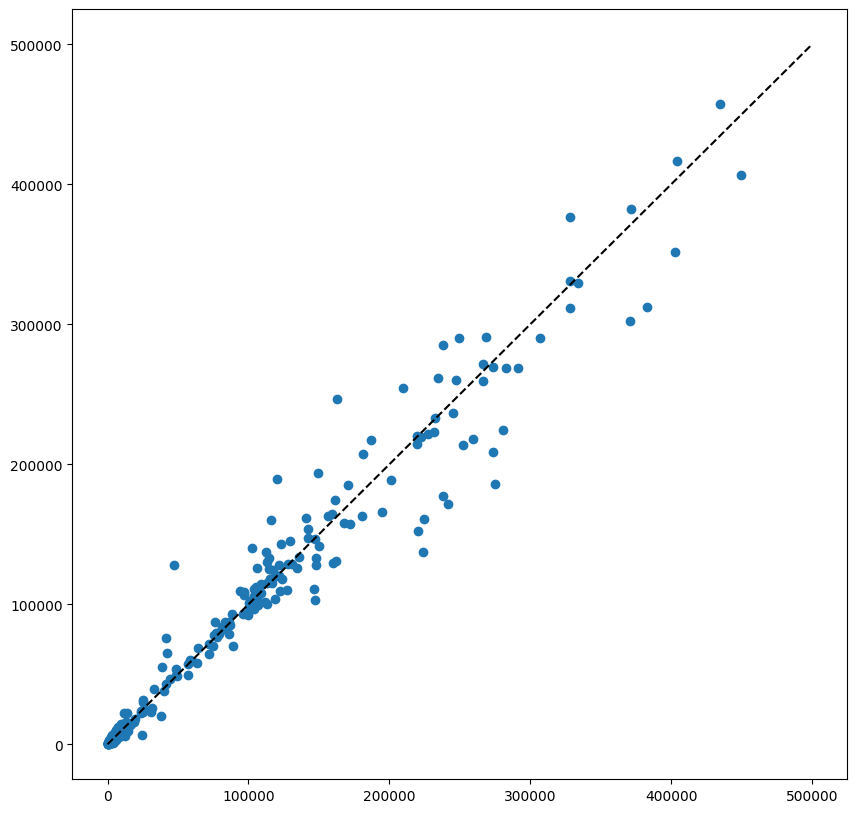

In [7]:
plt.figure(figsize=(10,10))
plt.plot(y_test, model.predict(X_test), 'o')
plt.plot([0, 500000], [0, 500000], 'k--')
plt.show()